In [5]:
library(cidr)
library(rhdf5)

In [2]:
par(ask=FALSE)

In [3]:
## Generate simulated single-cell RNA-Seq tags.
N=3 ## 3 cell types
k=50 ## 50 cells per cell type

In [4]:
sData <- scSimulator(N=N, k=k)

In [6]:
dim(sData$tags)

[1] 20180   150

In [7]:
## tags - the tag matrix
tags <- as.matrix(sData$tags)

In [8]:
cols <- c(rep("RED",k), rep("BLUE",k), rep("GREEN",k))

In [9]:
#log transform
ltpm <- log2(t(t(tags)/colSums(tags))*1000000+1)

In [10]:
pca <- prcomp(t(ltpm))

In [6]:
input_hdf5 = '../hdf5_data/PBMC68k_zheng17.loom'

In [7]:
h5f = H5Fopen(input_hdf5)

In [8]:
matrix = h5f$matrix

In [10]:
H5Fclose(h5f)

In [11]:
dim(matrix)

[1]  1000 68579

In [13]:
tags = matrix
tags <- log2(t(t(tags)/colSums(tags))*1000000+1)

## CIDR

In [14]:
sData <- scDataConstructor(tags)
sData <- determineDropoutCandidates(sData)
sData <- wThreshold(sData)
sData <- scDissim(sData)
sData <- scPCA(sData)
sData <- nPC(sData)
#nCluster(sData)
sData <- scCluster(sData)

ERROR: Error: cannot allocate vector of size 35.0 Gb


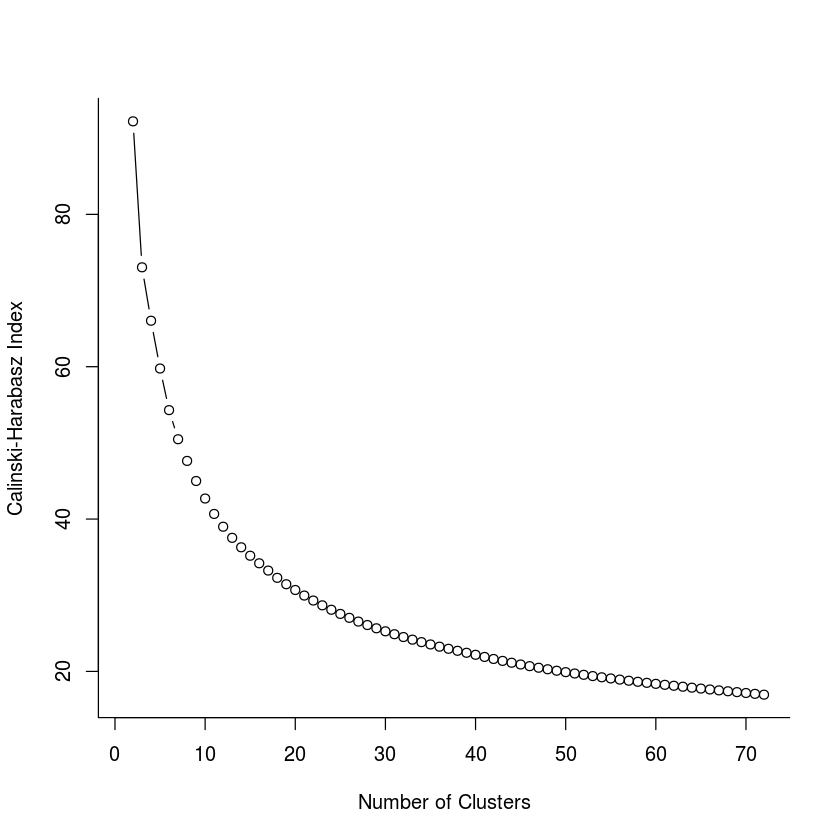

In [45]:
nCluster(sData)

In [48]:
adjustedRandIndex(sData@clusters,cols)

[1] 0.5945642

In [13]:
0.0381659311174191

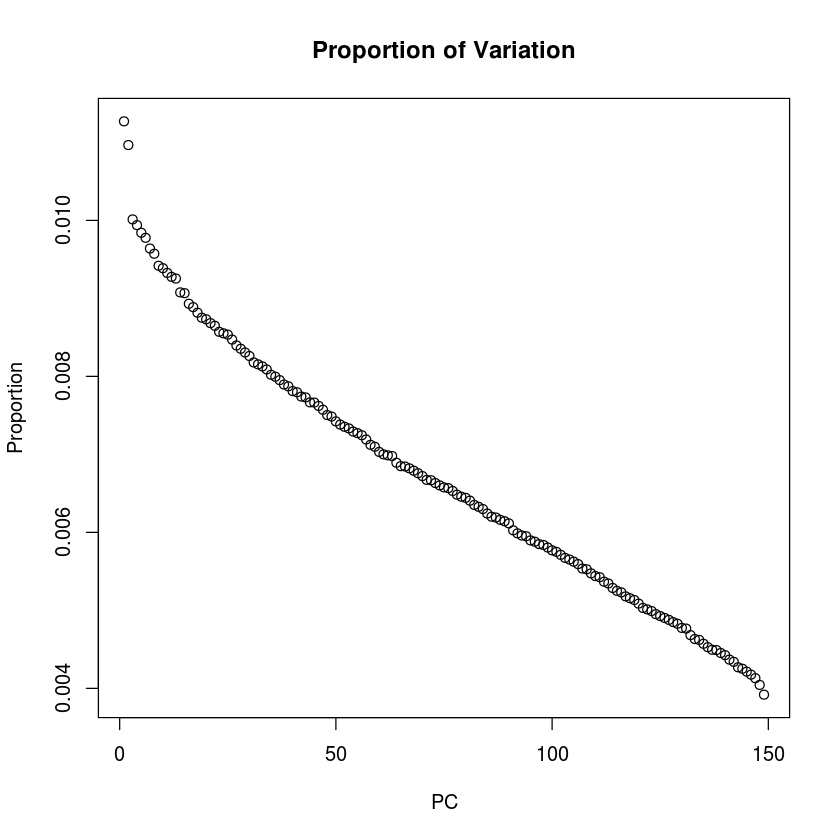

In [19]:
adjustedRandIndex(sData@clusters,cols)

[1] 0.9203693

In [20]:
sData@clusters

[1] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2